In [6]:
### Loading the data
import pandas as pd
import numpy as np
dsjobs = pd.read_csv('data_science_jobs.csv')
dsjobs.drop(['Unnamed: 0'],inplace=True,axis=1)


In [2]:
x='1.0'
float(x)

1.0

In [7]:
cleandata=dsjobs[['id','key_skills','location','hiring_org']]
cleandata=cleandata.join(pd.DataFrame(cleandata.key_skills.str.split('|', expand=True).stack().reset_index(level=1, drop=True)
                ,columns=['key_skill'])).drop('key_skills',1).rename(columns=str.strip).reset_index(drop=True)
cleandata=cleandata.join(pd.DataFrame(cleandata.location.str.split('|', expand=True).stack().reset_index(level=1, drop=True)
                ,columns=['locations'])).drop('location',1).rename(columns=str.strip).reset_index(drop=True)
cleandata.key_skill=cleandata.key_skill.str.lower()
cleandata.key_skill=cleandata.key_skill.replace('developer','')
cleandata.key_skill=cleandata.key_skill.str.strip()
cleandata.key_skill=cleandata.key_skill.str.split().apply(lambda itemlist: ' '.join(list(dict.fromkeys(itemlist))))
cleandata.locations=cleandata.locations.str.strip()
cleandata.locations=cleandata.locations.str.lower()
cleandata.hiring_org=cleandata.hiring_org.str.strip()
cleandata.hiring_org=cleandata.hiring_org.str.lower()
cleandata=cleandata.drop_duplicates()
machineLearningjobs=cleandata[cleandata.key_skill.str.lower().str.contains('machine learning')==True]

In [19]:
cleandata.key_skill.apply(re.sub('Python*','Python',item))

NameError: name 'item' is not defined

In [22]:
def strReplace(toreplace):
    import re
    return re.sub(r'(system)(.*)','system',toreplace)
strReplace('systemqa engineer')

'system'

In [15]:
from wordcloud import STOPWORDS
STOPWORDS.discard('r')
STOPWORDS.update(['best','practice','mostly','handson','senior','mid','level','developer','expert','bus','management',
                 'intermediate','years','experience'])
# STOPWORDS

x=cleandata.key_skill.str.split().apply(lambda itemlist: ' '.join([x for x in itemlist if x not in STOPWORDS]))
x=x.str.split()
x[x.str.len()>4]
# STOPWORDS

33325            [big, data, processing, framework, hadoop]
33326            [big, data, processing, framework, hadoop]
33327            [big, data, processing, framework, hadoop]
38347     [real, time, operating, systemstechnical, arch...
38562     [software, product, developmentqa, engineer, a...
40629              [javascriptsr, cloud, engineer, rd, lab]
40630                        [sr, cloud, engineer, rd, lab]
41579      [principal, ui, software, development, engineer]
45640              [real, time, operating, systemsdot, net]
45662     [real, time, operating, systemsmanufacturing, ...
45674     [real, time, operating, systemsproduct, sw, de...
45686     [real, time, operating, systemshardware, rewor...
45698     [real, time, operating, systemsit, support, sr...
45722     [real, time, operating, systemsfield, support,...
45734     [real, time, operating, systemsfield, support,...
45747     [real, time, operating, systemsmanufacturing, ...
45758     [real, time, operating, system

In [1]:
from wordcloud import STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

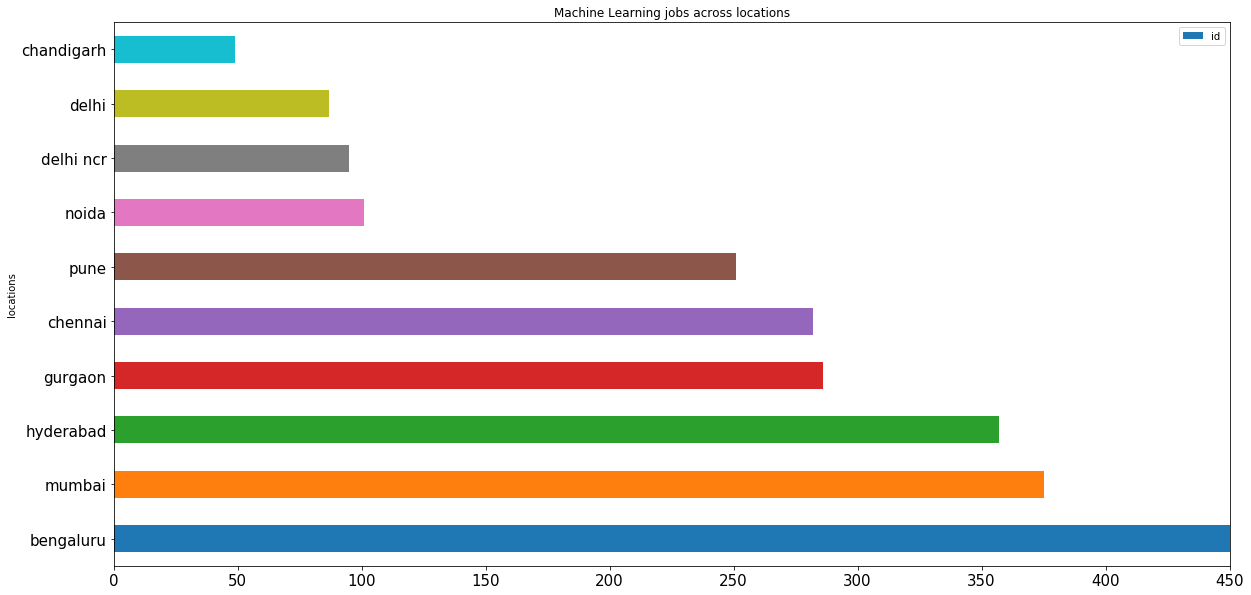

In [10]:
locwise=machineLearningjobs[['locations','id']].groupby('locations').agg('count').reset_index()
locwise=locwise.sort_values('id',ascending=False).head(10)
import matplotlib.pyplot as plt
locwise.plot(kind='barh',x='locations',y='id',figsize=(20,10),title='Machine Learning jobs across locations',fontsize=15,
             xlim=(0,450))

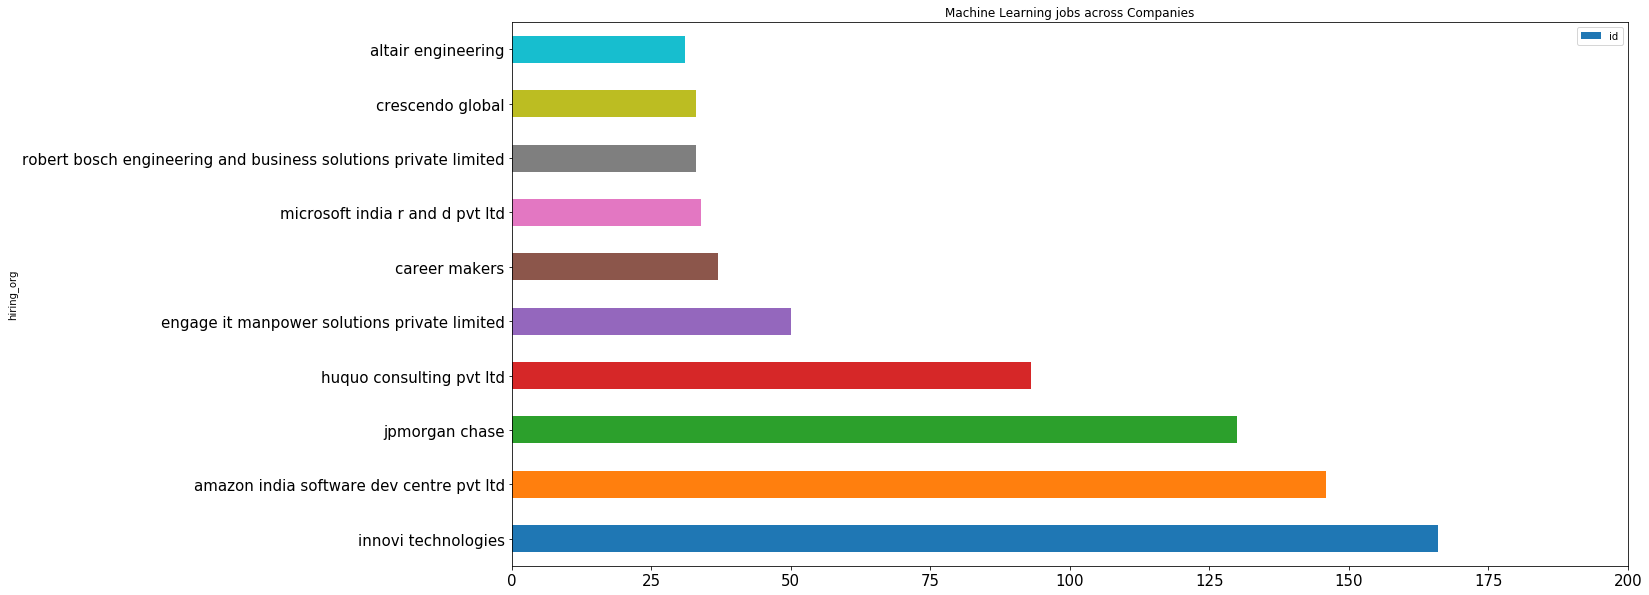

In [11]:
orgvscount=machineLearningjobs[['hiring_org','id']].groupby('hiring_org').agg('count').reset_index()
orgvscount=orgvscount.sort_values('id',ascending=False).head(10)
import matplotlib.pyplot as plt
orgvscount.plot(kind='barh',x='hiring_org',y='id',figsize=(20,10),title='Machine Learning jobs across Companies',fontsize=15,
             xlim=(0,200))

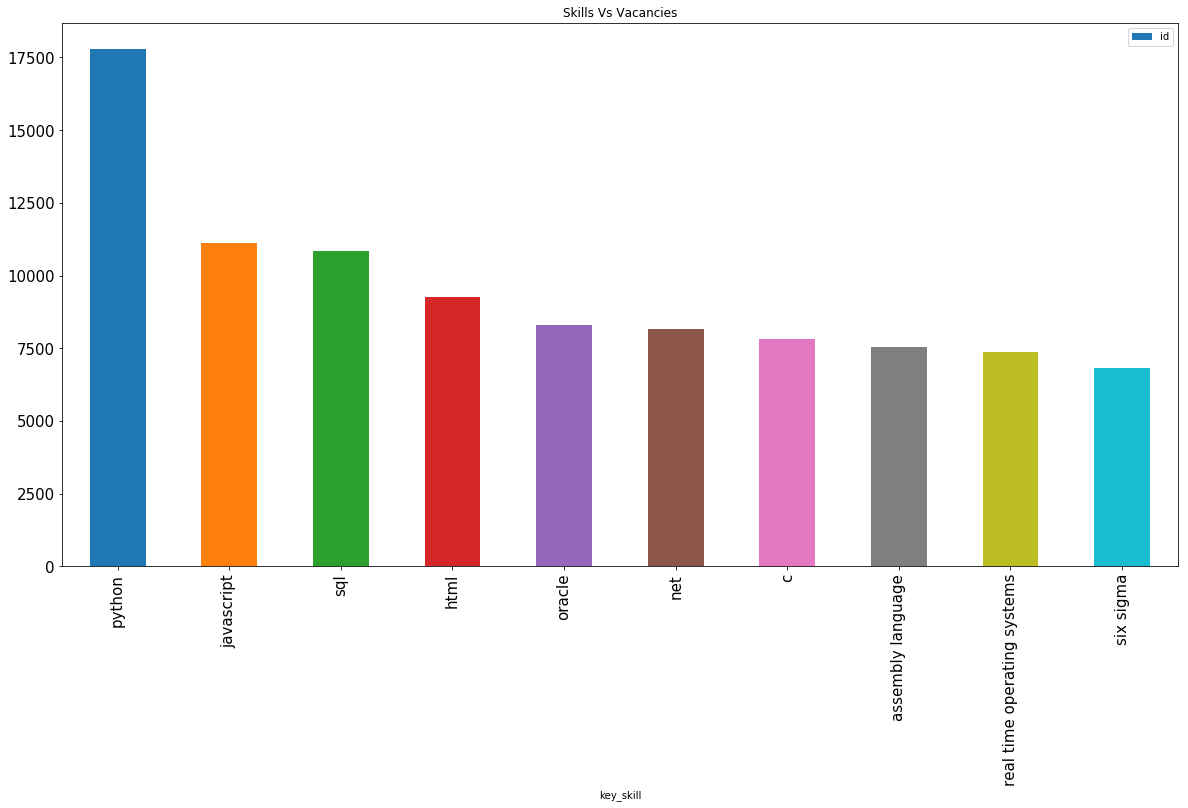

In [12]:
skillvscounts=cleandata[['key_skill','id']].groupby('key_skill').agg('count').reset_index()
skillvscounts=skillvscounts.sort_values('id',ascending=False).head(10)
import matplotlib.pyplot as plt
skillvscounts.plot(kind='bar',x='key_skill',y='id',figsize=(20,10),title='Skills Vs Vacancies',fontsize=15,xlim=200)

In [ ]:
# job_sal=dsjobs[['id','salary']]
# job_sal.join(pd.DataFrame(dsjobs.salary.str.split("|", expand = True).dropna(how='all'),columns=['']))
# dsjobs.salary.unique()
# help(dsjobs.salary.str.split(" | ", expand = True))

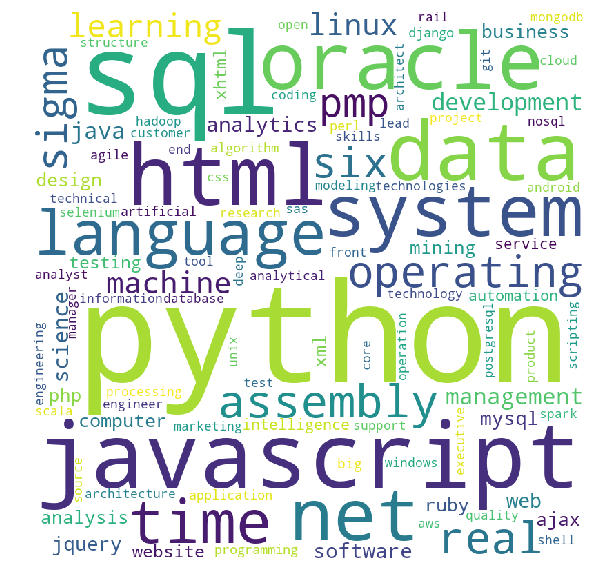

In [13]:
skillcounts=cleandata[['key_skill','id']].groupby('key_skill').agg('count').reset_index()
top20skills=skillcounts.sort_values('id',ascending=False).head(2000)
from wordcloud import WordCloud, STOPWORDS
allwords=''
for idx in range(0,2000):
    for word in top20skills['key_skill'].values[idx].split(' '):
        allwords=allwords+(word.strip()+' ')*(top20skills['id'].values[idx])
#         print(allwo)
# allwords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS.discard('r'),
                collocations = False,
                min_font_size = 15).generate(allwords) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 